## Fooling neural networks

Here we show how to fool a neural network using a gradient ascent technique over the input.

In [8]:
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K
from tensorflow.keras import losses 
import numpy as np
import matplotlib.pyplot as plt

Let us start importing the VGG16 model.

In [9]:
model = VGG16(weights='imagenet', include_top=True) # is a pre-trained model consisting in convolutional layers followed by max pooling operators ending with dense layers 
#model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 138s 0us/step


Now, we load an image (in our case, an elephant)

In [10]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

Next, we classify it. 

VGG16 is higly confident it is an elephant.

In [11]:
img = image.load_img('elephant2.jpg', target_size=(224, 224))

x0 = image.img_to_array(img)
x = np.expand_dims(x0, axis=0)
preds = model.predict(x) # feed the model with the elephant image 
print("label = {}".format(np.argmax(preds)))
print('Predicted:', decode_predictions(preds, top=3)[0])

xd = image.array_to_img(x[0])
imageplot = plt.imshow(xd)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'elephant2.jpg'

Now we try to convert the image into something different: a tiger shark, with label 3.

In [12]:
output_index = 3 #tiger shark

expected_output = np.zeros(1000)
expected_output[output_index] = 1
expected_output = K.variable(np.reshape(expected_output,(1,1000)))

Now we simply iterate the gradient ascent technique for a sufficent number of steps, working on a copy of the original image

In [71]:
input_img_data = np.copy(x) # copy of the elephant image 

# run gradient ascent for 50 steps
for i in range(50):
    print("iteration n. {}".format(i))
    with tf.GradientTape() as g:
      x = K.variable(input_img_data)
      y = model(x)
      loss = tf.keras.losses.categorical_crossentropy(y,expected_output) # loss between elephant - tiger shark
    res = y[0]
    print("elephant prediction: {}".format(res[386]))
    print("tiger shark prediction: {}".format(res[3]))
    grads_value = g.gradient(loss, x)[0] # compute the derivative with respect to the input x, the parameters are fixed 
    print(grads_value.shape)
    ming = np.min(grads_value)
    maxg = np.max(grads_value)
    #print("min grad = {}".format(ming))
    #print("max grad = {}".format(maxg))
    scale = 1/(maxg -ming)
    #brings gradients to a sensible value
    input_img_data -= grads_value * scale # gradient ascent, the elephant became a tiger shark (for the net)


iteration n. 0
elephant prediction: 0.271149456501
tiger shark prediction: 6.29209928604e-09
(224, 224, 3)
iteration n. 1
elephant prediction: 0.281902700663
tiger shark prediction: 1.5599056491e-09
(224, 224, 3)
iteration n. 2
elephant prediction: 0.269811719656
tiger shark prediction: 6.18359363713e-09
(224, 224, 3)
iteration n. 3
elephant prediction: 0.28002473712
tiger shark prediction: 1.58007817941e-09
(224, 224, 3)
iteration n. 4
elephant prediction: 0.291066497564
tiger shark prediction: 3.82965881229e-10
(224, 224, 3)
iteration n. 5
elephant prediction: 0.295582085848
tiger shark prediction: 3.7838754352e-10
(224, 224, 3)
iteration n. 6
elephant prediction: 0.295692920685
tiger shark prediction: 4.01752936474e-10
(224, 224, 3)
iteration n. 7
elephant prediction: 0.288921773434
tiger shark prediction: 1.42619627219e-09
(224, 224, 3)
iteration n. 8
elephant prediction: 0.2917060256
tiger shark prediction: 1.58619251067e-09
(224, 224, 3)
iteration n. 9
elephant prediction: 0.2973

At the end, VGG16 is extremely confident he is looking at a tiger shark

In [72]:
preds = model.predict(input_img_data)
print("label = {}".format(np.argmax(preds)))
print('Predicted:', decode_predictions(preds, top=3)[0])

label = 3
('Predicted:', [(u'n01491361', u'tiger_shark', 0.9913406), (u'n01494475', u'hammerhead', 0.003008757), (u'n01484850', u'great_white_shark', 0.0024799022)])


Let us look at the resulting image (we both print the original and the processed image)

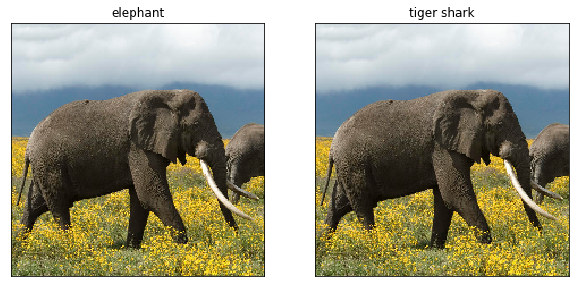

In [73]:
nimg = input_img_data[0]
nimg = image.array_to_img(img)

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.title("elephant") # original image 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(xd)
ax = plt.subplot(1, 2, 2)
plt.imshow(nimg)
plt.title("tiger shark") # modified image
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

imageplot = plt.imshow(img)
plt.show()

We just fooled the neural network! 